Create and train a NN without a framework
Ideas taken from https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [5]:
import numpy as np

In [66]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

We create a NN with input x and output y. It has a hidden layer with 4 nodes. Weights from input layer to hidder layer as denoted as W1 (biases=b1) and from hidden layer to the output layer as W2 (biases=b2)
Activate function will sigmoid, let's represent it with s

y' = s( W2 * ( s(W1 * x + b1) ) + b2 )

You might notice that in the equation above, the weights W and the biases b are the only variables that affects the output ŷ.

We will use squared error as loss function. Our goal in training is to find the best set of weights and biases that minimizes the loss function.

In [173]:
class NeuralNetwork:
    def __init__(self, x, y, hidden_nodes):
        self.input = x
        self.hidden_nodes = hidden_nodes
        self.weights1 = np.random.rand(self.input.shape[1], self.hidden_nodes) 
        self.weights2 = np.random.rand(self.hidden_nodes, 1)                 
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.loss = 0

    def forward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
        self.loss = (self.y - self.output ** 2).sum()

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  
                            (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), 
                                    self.weights2.T) * sigmoid_derivative(self.layer1)))
               
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
    def describe(self):
        print(f'Inputs: {self.input.shape[1]}')
        print(f'Weights: {self.weights1.shape[0]} x {self.weights1.shape[1]}')
        print(f'Hidden layer: {self.hidden_nodes}')
        print(f'Weights: {self.weights2.shape[0]} x {self.weights2.shape[1]}')
        print(f'Output layer: {1}')

In [595]:
class NeuralNetwork:
    def __init__(self, x, y, layers, learning_rate):
        self.input = x
        self.weigths = []
        self.activations = []
        self.learning_rate = learning_rate
        
        previous_layer = x
        for i in range(len(layers)):
            current_layer = np.random.rand(previous_layer.shape[1], layers[i])
            self.weigths.append(current_layer)
            previous_layer = current_layer
        
        self.weigths.append(np.random.rand(previous_layer.shape[1], 1)) # 1 output
                  
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.loss = 0

    def forward(self):
        
        self.activations = []
        self.activations.append(self.input)
        
        temp = self.input
        for i in range(len(self.weigths)):
            temp = sigmoid(np.dot(temp, self.weigths[i]))            
            self.activations.append(temp)
            
        self.output = temp        
        
        self.loss = ((self.y - self.output) ** 2).sum()

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights               
        # update the weights with the derivative (slope) of the loss function
        
        for i in range(len(self.weigths), 0, -1):
                     
            chain = 2*(self.y - self.output) * sigmoid_derivative(self.output)
            
            for layer in range(len(self.weigths), i, -1):
                chain = np.dot(chain,
                               self.weigths[layer-1].T) \
                * sigmoid_derivative(self.activations[layer-1])
                      
            d_weight =  np.dot(self.activations[i-1].T, chain)
                       
            self.weigths[i-1] += self.learning_rate * d_weight
        
    def describe(self):
        print(f'Input: {self.input.shape[1]}')
        
        for i in range(len(self.weigths)):
            print(f'Layer {i}: {self.weigths[i].shape[0]} x {self.weigths[i].shape[1]}')

In [596]:
#layers = (4,2,5)
#myNN = NeuralNetwork(x, y, (10,6))
#myNN.nodes

In [597]:
x = np.array ([   [0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]
    ])

y = np.array ([[0], 
               [1],
               [1],
               [0]])

myNN = NeuralNetwork(x, y, (8,4), 1e-0)
myNN.describe()

#myNN.weigths[0] = np.ones((3,3))

Input: 3
Layer 0: 3 x 8
Layer 1: 8 x 4
Layer 2: 4 x 1


In [602]:
#myNN.forward()
print(myNN.output)

[[0.01079741]
 [0.98747879]
 [0.98813755]
 [0.01475056]]


In [599]:
myNN.backprop()

In [600]:
loss=[]

for i in range(2000):
    myNN.forward()
    if i % 100 == 0:
        print(i, myNN.loss)
        loss.append(myNN.loss)
    myNN.backprop()
    
print(myNN.output)

0 1.1117019133768415
100 0.9988762003541011
200 0.9977292277085708
300 0.9948518993419397
400 0.9813307246755729
500 0.7921703610900679
600 0.4758668068898093
700 0.028268038830201972
800 0.007682019518743047
900 0.0043089419713603465
1000 0.0029356165851813763
1100 0.0022025956402161127
1200 0.0017511482703233168
1300 0.0014470640228965834
1400 0.0012292362828486409
1500 0.0010660208714185892
1600 0.0009394574944123463
1700 0.0008386254780143561
1800 0.0007565177505387318
1900 0.0006884399119267833
[[0.01079741]
 [0.98747879]
 [0.98813755]
 [0.01475056]]


In [547]:
y.shape

(4, 1)

In [548]:
x[0]

array([0, 0, 1])

In [177]:
np.dot(x[0], myNN.weights1)

array([0.57687046, 0.30359808, 0.08599636, 0.55818046])

In [242]:
#2*(myNN.y - myNN.output) * sigmoid(myNN.output)
#myNN.output, y

#y,sigmoid(y)

#d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))

#myNN.input.shape[1]
first_input = np.reshape(myNN.input[0], (1,3))

layer1 = sigmoid(np.dot(first_input, myNN.weights1))
np.dot(layer1.T, (2*(myNN.y[0] - myNN.output[0]) * sigmoid_derivative(myNN.output[0])))
#layer1.T.shape[0], (2*(myNN.y[0] - myNN.output[0]) * sigmoid_derivative(myNN.output[0]))

#d_weights1 = np.dot(self.input.T,  
#                    (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), 
#                            self.weights2.T) * sigmoid_derivative(self.layer1)))

np.dot(first_input.T,
np.dot(2*(myNN.y[0] - myNN.output[0]) * sigmoid_derivative(myNN.output[0]), 
                            myNN.weights2.T).reshape(1,4)
      )

array([[-0.        , -0.        ,  0.        , -0.        ],
       [-0.        , -0.        ,  0.        , -0.        ],
       [-0.01132414, -0.14968314,  0.02096708, -0.1198421 ]])

In [184]:
#sigmoid(np.dot(myNN.input, myNN.weights1)).T
np.dot(myNN.input[0], myNN.weights1)

array([0.57687046, 0.30359808, 0.08599636, 0.55818046])

In [196]:
myNN.forward()
print(myNN.output)
myNN.backprop()

[[0.82396258]
 [0.8739199 ]
 [0.88234037]
 [0.90557205]
 [0.78291925]]


In [446]:
import matplotlib.pyplot as plt

In [603]:
loss

[1.1117019133768415,
 0.9988762003541011,
 0.9977292277085708,
 0.9948518993419397,
 0.9813307246755729,
 0.7921703610900679,
 0.4758668068898093,
 0.028268038830201972,
 0.007682019518743047,
 0.0043089419713603465,
 0.0029356165851813763,
 0.0022025956402161127,
 0.0017511482703233168,
 0.0014470640228965834,
 0.0012292362828486409,
 0.0010660208714185892,
 0.0009394574944123463,
 0.0008386254780143561,
 0.0007565177505387318,
 0.0006884399119267833]

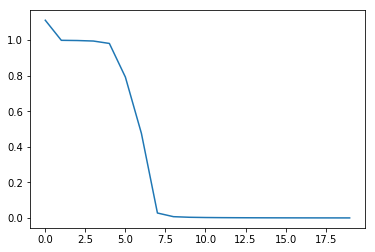

In [601]:
plt.plot(loss)
plt.show()